Name :- Otaradi Vijay D.

Enrollment NO.:- 22SOEIT11020

Roll NO.:- 18

6th B.Tech ( IT )

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils import distance_metric,type_metric

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [3]:
wine = datasets.load_wine()

In [4]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]], shape=(178, 13)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [5]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine.data)

In [8]:
#convert numpy array to list of lists
X_scaled_list = X_scaled.tolist()

In [9]:
#
k = 3

In [10]:
initial_centroids = np.random.choice(len(X_scaled_list),k,replace=False)

In [11]:
# index values convert array
initial_centroids_points =  [X_scaled_list [i] for i in initial_centroids]

In [18]:
metric = distance_metric(type_metric.EUCLIDEAN)
kmeans_instance = kmeans(X_scaled, initial_centroids_points)

In [16]:
kmeans_instance.process()

In [20]:
cluster = kmeans_instance.get_clusters()
centroids = kmeans_instance.get_centers()

In [21]:
cluster_labels = np.zeros(len(X_scaled_list))
for cluster_id , cluster in enumerate(cluster):
    for index in cluster:
        cluster_labels[index] = cluster_id

AttributeError: PathCollection.set() got an unexpected keyword argument 'lable'

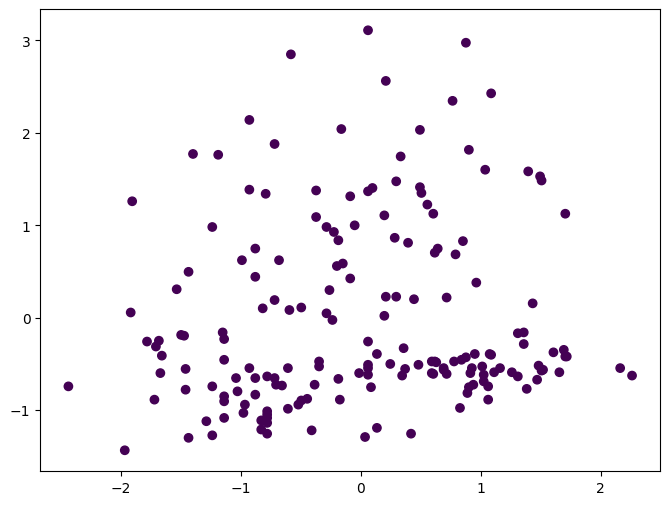

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[: , 0], X_scaled[: , 1], c = cluster_labels, cmap='viridis', marker='o')

# Mark the centroids in red
for centroid in centroids:
    plt.scatter(centroid[0],centroid[1], s=200 , c='red' ,marker='X',lable = 'Centroid')

plt.title("K-means Clustering (Wine Dataset) With PyCluster")
plt.legend()
plt.show()